# Visualizing Decay Reaction Kinetics with Python

### Computational Guided Inquiry for General Chemistry 
Written by Dr. Steven Neshyba (University of Puget Sound)
<br><i>Adapted for Chem 12 at Santa Clara University by Ayush Kris (Class of 2021), Dr. Grace Stokes, Dr. Hoda Mirafzal, and Dr. Megan Tichy</i></br>

## Learning Objective: 
*   Predict the half-life of first or second order decay reaction from concentration/time data.
*   Visualize the differences between 1st and 2nd order kinetic rate laws using Python modeling.
*   Discriminate between theoretically generated models to determine which one best matches the experimental data.
*   Explain the utility of Python for complicated kinetics data interpretation.

## Key activities 
1) Graph experimental data for a decay reaction and estimate half-life.
<br>2)  Show theoretical reactant concentrations in a table and in a graph.
<br>3) Determine the reaction orders by comparing the experimental and theoretical graphs.</br>

##**Before starting this excercise, make a copy of this file (Go to File > Save a copy in Drive). Rename the copy with YOUR (student's) name (not your instructor's name). Make sure to share the file with your instructor and TA.**

# Part 1. Introduction
The kinetics of stoichiometrically simple reactions can be described using what is called the <i>order</i> of a reaction. For the general reaction $ A \longrightarrow products $, described by the rate law $ rate =k[A]^n$, the reaction is $ n^th $ order with respect to the reactant $ A $. In this exercise, we will use python code to evaluate the kinetics (i.e. find out the order of the reaction) of the decomposition of two main atmospheric pollutants: ozone and nitrogen dioxide.

### A Little on Python
Python is a widely used, open source programming language and was designed to be readable with a simple and consistent syntax. Best of all, Python is free and readily available to both PC and MAC users! In this exercise, we will use Python to visualize how the concentration of a reactant changes as a function of time depending on the reaction order. **You don't have to know any python or any programming to go through this exercise.** Just keep the following in mind as you complete the exercise:

*   Hashtags (<i>#</i>) at the beginning of a line signify comments and get color-coded as green but do not impact the execution of the code.
*   The notebook only executes the current code block. This can have several unintended consequences. If you change a value and then go back and run an earlier code block, it will use the new value, not the first defined value, which may give you incorrect analysis. Similarly, if you open your notebook later, and try to run a code block in the middle, it may tell you that your variables are undefined, even though you can clearly see them defined in earlier code blocks. But if you didn’t re-run those code blocks, then Python doesn’t know they exist.

<br> The first step in any python exercise is to bring in (or import) the libraries for numerical operations and graphics. That's what the next cell does. 
Click in the box, then press Shift and Enter at the same time.</br>

In [ ]:
# Execute this cell with shift-enter or by left-clicking the "play button" to the left. 
# This cell imports various libraries and packages that we will need

# numpy is used for numerical operations
import numpy as np

# matplotlib.pyplot is used for graphics
import matplotlib.pyplot as plt

# We will use pandas to make data tables
import pandas as pd

print('You did it! Libraries are now imported.')

You did it! Libraries are now imported.


# Part 2. Kinetics of an Ozone Decay Reaction

## Predicting Half-life from Experimental Data
In the stratosphere (10 km to 50 km above the Earth's surface), ozone ($O_3$) protects living things from ultraviolet (UV) radiation from the sun. However, $O_3$ can also be found at ground level (below 10 km), where it is harmful to human health. For more information, see https://www.epa.gov/ground-level-ozone-pollution. The data in Table 1 was collected during an ozone (or $O_3$) decay reaction:


<p style='text-align: right;'>
$O_3 (g) \overset{sunlight} \longrightarrow  O_2(g) + O(g) $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$
</p>


<p style ='text-align: center;'>
Table 1. Experimentally measured ozone concentrations versus time.
<p></p>
<p></p>
<img src="https://www.gystokes.com/wp-content/uploads/2020/09/Table1_ozone_kinetics.png" height="264" width="320"/> </p>

Look carefully at the experimental data in Table 1. Estimate the half life ($t_\frac{1}{2}$). As a reminder, the $t_\frac{1}{2}$ is the time (in seconds) that it takes for the concentration to drop to half of its initial value. Write your answer in your lab notebook. </br>

<p>In the cell below, <b>half_life_s</b> stands for the value of the half-life of the reaction in units of seconds. Change the value for <b>half_life_s</b> to the value you decided was most valid (this should be the same as the answer to your prelab question 5). The correct value should NOT be 200. Then, execute the cell by shift+enter. Write your estimated value of the half-life in your notebook. </p>



In [ ]:
# Execute this cell with shift-enter or by left-clicking the "play button" to the left. 
# We include the units in the variable name to avoid a syntax error. 
half_life_s = 200
print('half life =',half_life_s,'s')

half life = 200 s


##Calculating Ozone Concentrations Based on 1st and 2nd Order Rate Laws

In Table 1, ozone concentration, [$ozone$], was measured every $100.0 s$ over a timespan ranging from 0.0 to 600.0 seconds. Our goal is to calculate the theoretical values for [$ozone$] (M) at each time interval and compare the theoretical value to the provided measured value.

In the following cell, python will use the estimated value of half-life that you inputted in the previous cell to determine the corresponding 1st and 2nd order rate constants ($k_1$ and $k_2$) by using the following equations:

<p style='text-align: right;'>
$k_1 = \dfrac{ln(2)}{t_\frac{1}{2}}$  
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ (1st-order Half-life Equation)  
<br>

<p style='text-align: right;'>
$k_2 = \dfrac{1}{t_\frac{1}{2}[A]_0}$  
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$   (2nd-order Half-life Equation)   
<br>

In the above equations, $[A]_0$ stands for the initial concentration of the reactant, in this case ozone. 
The code will then calculate and print the theoretical ozone concentration at each time interval by using the integrated rate laws for 1st and 2nd order reactions:

<p style='text-align: right;'>
$ [A] = [A]_0e^{-k_1t}$
$\qquad\qquad\qquad\qquad\qquad\qquad$  (1st-order Integrated Rate Law) 
</p>

<p style='text-align: right;'>
$ [A] =( \frac{1}{[A]_0}+k_2t)^{-1}$
$\qquad\qquad\qquad\qquad\qquad$ (2nd-order Integrated Rate Law)
</p>



In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# Part 2a: In the command below, we input the times (in seconds) when we collect each data point.
# The number 7 in the parentheses indicates that there are 7 evenly-spaced data points between 0 and 600. 
time_s_exp=np.linspace(0,600,7)
      
# The function np.array allows you to input values that you type directly into a list.
# We got these values from the right-most column of Table 1
ozone_conc_M_exp = np.array([0.000100,0.0000896,0.0000803,0.0000717,0.0000644,0.0000577,0.0000517])

# We define initial_O3_conc_M from the value found in the top row of Table 1 (measured at t=0.0 s)
initial_O3_conc_M = 1E-4
print('Initial ozone conc =',initial_O3_conc_M,'M')

# Part 2b: 1st order rate law
# Here is where we calculate ln2 and plug into Equation 4 to get k1
x=np.log(2)
print(f'Half-life = {half_life_s} seconds')
k1= x / half_life_s
# recall that the units of k1 is s^-1
print(f'The first order rate constant (k1)={k1:.5} s^-1.')
# In the numpy library, exponentials are denoted as exp(...) so for example, exp(5) = e^5.
# This line of code generates the ozone concentration data from Equation 3 for a 1st order reaction
ozone_1st_order_M=initial_O3_conc_M*np.exp(-k1*time_s_exp)

# Part 2c: 2nd order rate law
# recall that the units of k2 is M^-1 s^-1
k2=1/(half_life_s*initial_O3_conc_M)
print(f'The second order rate constant (k2) is {k2:.5} M^-1 s^-1.')
# Here we predict the ozone concentration data from Equation 6 for a 2nd order reaction
# Note that ** means raised to the power of (In Python, ax^3 can be written as a*x**3)
ozone_2nd_order_M=(((1/(initial_O3_conc_M))+k2*time_s_exp))**(-1)

# Part 2d: Input the data generated above into a table
# Create an empty dataframe
df = pd.DataFrame()
# Add data to the dataframe
df['time (s)'] = time_s_exp
df['exp[ozone](M)'] = ozone_conc_M_exp
df['theor[ozone]-1st'] = ozone_1st_order_M
df['theor[ozone]-2nd'] = ozone_2nd_order_M

# This command makes the table in this cell
df

Initial ozone conc = 0.0001 M
Half-life = 750 seconds
The first order rate constant (k1)=0.0009242 s^-1.
The second order rate constant (k2) is 13.333 M^-1 s^-1.


,time (s),exp[ozone](M),theor[ozone]-1st,theor[ozone]-2nd
0,0.0,0.000100,0.000100,0.000100
1,100.0,0.000090,0.000091,0.000088
2,200.0,0.000080,0.000083,0.000079
3,300.0,0.000072,0.000076,0.000071
4,400.0,0.000064,0.000069,0.000065
5,500.0,0.000058,0.000063,0.000060
6,600.0,0.000052,0.000057,0.000056


## In Your Notebook:

Take a screenshot of the table python generated and paste it in the Results section of your notebook. Make sure to record the following in the Observations section:

* The value of the 1st-order rate constant.
* The value of the 2nd-order rate constant.
* According to the table you generated, which theoretical reaction order (1st order rate law or 2nd order rate law) is closer to the experimentally-determined values for ozone decay?

## Plotting the Experimental Ozone Concentrations
You may have noticed that the comparison of the tabulated experimental ozone concentrations with the tabulated theoretical ozone concentrations was not very conclusive. As you'll soon see, plotting the data will make the comparison a lot more obvious. Execute the following cell to plot the experimentally-measured ozone concentrations as a function of time. We will label our plot with the proper title, and x and y axes.

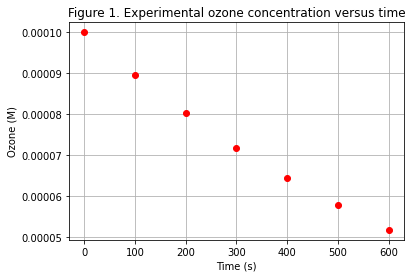

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.
# This initializes the plot window
plt.figure()

# This plots ozone_conc_M_exp (independent variable) as a function of time_s_exp (dependent variable)
# 'ro' means red circles. If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
plt.plot(time_s_exp,ozone_conc_M_exp,'ro')
plt.title('Figure 1. Experimental ozone concentration versus time')
plt.xlabel('Time (s)')
plt.ylabel('Ozone (M)')
plt.grid(True)

## Comparing the Plots of Experimental Data to 1st and 2nd Order Rate Laws

Now, we want to overlay our theoretical values from the 1st and 2nd order rates laws on a graph WITH the experimental data. In Figure 2 below, we will overlay the theoretical traces with the experimental data.

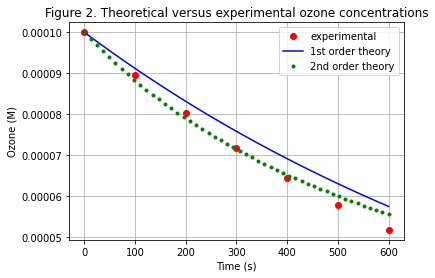

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# This code below generates 50 evenly-spaced points between 0 and 600 seconds
time_s_theor=np.linspace(0,600)

#recall that init_O3_conc_M, k1 and k2 were previously defined in Part 3b so we do not need to re-define it (unless we want to change the value for half-life)
ozone_theor_1st_M= initial_O3_conc_M*np.exp(-k1*time_s_theor)
ozone_theor_2nd_M=(((1/(initial_O3_conc_M))+k2*time_s_theor))**(-1)

# This initializes the plot window
plt.figure()

# This plots ozone_conc_M_exp (independent variable) as a function of time_s_exp (dependent variable)
plt.title('Figure 2. Theoretical versus experimental ozone concentrations')
plt.xlabel('Time (s)')
plt.ylabel('Ozone (M)')
plt.grid(True)

# These commands plot experimental data on the same graph as theoretical values for a 1st order decay and 2nd order decay.
# 'ro' means red circles, 'b-' means blue line and 'g.' means green dots (If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing)
plt.plot(time_s_exp,ozone_conc_M_exp,'ro',label='experimental')
plt.plot(time_s_theor,ozone_theor_1st_M,'b-',label='1st order theory')
plt.plot(time_s_theor,ozone_theor_2nd_M,'g.', label='2nd order theory')

#This command generates a legend.
plt.legend()

## In Your Notebook:
Take a screenshot of Figure 2 and paste it in the Results section of your lab notebook. In the Observations section of your notebook, answer the following questions: 
* Based on "Figure 2. Theoretical versus experimental ozone concentrations", which theoretical reaction order (1st order rate law or 2nd order rate law) is closer to the experimentally-determined values for ozone decay? 
* What are the advantages and disadvantages of doing a visual comparison using the graph above versus a numerical comparison from the data table you made in the previous part?
* Go back and change the value of the half-life that you inputted. How does a decrease/ increase in the value of the estimated half-life change the value of the rate constants and the graphs? As an example, try inputting a half-life of 750 seconds and a half-life of 300 seconds. Record these observations. Could you have gotten the wrong order for the reaction by estimating the wrong half-life? Record these observations. **Remember that every time you change the value of the half-life, you should re-run the cells.**  

**When you're done experimenting with the half-life value, don't forget to change the value of the half-life to your original estimate and re-run the cells.**

# Part 3. Kinetics of a Nitrogen Dioxide Decomposition Reaction

##Prediciting Half-Life from Experimental Data
Nitrogen Dioxide (or $NO_2$) is primarily released into the air from the burning of fuel. $NO_2$ forms from the emissions of cars, buses, trucks, power plants. For more information, see https://www.epa.gov/no2-pollution. The data shown in Table 2 was collected during the decomposition of $NO_2$ to nitric oxide ($NO$):
<p style='text-align: right;'>
$NO_2 (g) \longrightarrow  NO(g) + \dfrac{1}{2}O_2(g) $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad  (8) $
</p>

<p style ='text-align: center;'>
Table 2. Nitrogen dioxide concentration versus time.
<p>
<img src="https://www.gystokes.com/wp-content/uploads/2020/09/Table2.png" height="264" width="320"/></p>

Look carefully at the experimental data in Table 2. Estimate the half life ($t_\frac{1}{2}$). As a reminder, the $t_\frac{1}{2}$ is the time (in seconds) that it takes for the concentration to drop to half of its initial value. Write your answer in your lab notebook. </br>

<p>In the cell below, change the value for <b>half_life_s</b> to the value (in seconds, s) you decided is most valid. The correct value should NOT be 500.</p>


In [ ]:
# Execute this cell with shift-enter or by left-clicking the "play button" to the left. 
# We include the units in the variable name to avoid a syntax error. 
half_life_s = 500
print('half life =',half_life_s,'s')

half life = 200 s


## Plotting Experimental Nitrogen Dioxide Concentrations

Very similar to the ozone reaction, the following cell will use the estimated half-life that you inputted above to calculate the corresponding 1st-order and 2nd-order rate constants ($k_1$ and $k_2$) for the decomposition of nitrogen dioxide. Then, it will use the rate constants and the integrated rate laws for 1st and 2nd order reactions to compute theoretical nitrogen dioxide concentrations based on 1st order and 2nd order kinetics. As we learned from the ozone reaction, comparison of tabulated data may be difficult. So this time, we'll skip generating tabulated data. Instead, we will do a comparison of the plots. 

initial NO2 conc = 0.01 M
Half-life = 200 seconds
The first order rate constant (k1)=0.0034657 s^-1.
The second order rate constant (k2) is 0.5 M^-1 s^-1.


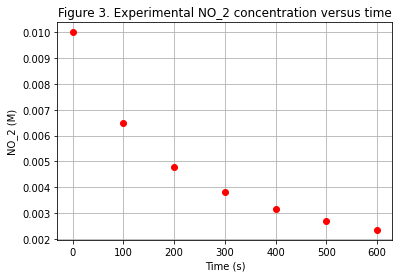

In [ ]:
# We define initial_NO2_conc_M from the value found in the top row of Table 1 (measured at t=0.0 s)
initial_NO2_conc_M = 1E-2
print('initial NO2 conc =',initial_NO2_conc_M,'M')

# Execute this cell with shift-enter or by clicking the "play button" to the left.

# Part 3a: In the command below, we input the times (in seconds) when we collect each data point.
# The number 7 in the parentheses indicates that there are 7 evenly-spaced data points between 0 and 600. 
time_s_exp=np.linspace(0,600,7)
      
# The function np.array allows you to input values that you type directly into a list.
# We got these values from the right-most column of Table 1
NO2_conc_M_exp = np.array([0.0100,0.00648,0.00479,0.00380,0.00315,0.00269,0.00235])

# Part 3b: 1st order rate law
# Here is where we calculate ln2 and plug into Equation 4 to get k1
x=np.log(2)
print(f'Half-life = {half_life_s} seconds')
k1= x / half_life_s
# recall that the units of k1 is s^-1
print(f'The first order rate constant (k1)={k1:.5} s^-1.')
# In the numpy library, exponentials are denoted as exp(...) so for example, exp(5) = e^5.
# This line of code generates the NO2 concentration data from Equation 3 for a 1st order reaction
NO2_1st_order_M=initial_NO2_conc_M*np.exp(-k1*time_s_exp)

# Part 3b: 2nd order rate law
# recall that the units of k2 is M^-1 s^-1
k2=1/(half_life_s*initial_NO2_conc_M)
print(f'The second order rate constant (k2) is {k2:.5} M^-1 s^-1.')
# Here we predict the NO2 concentration data from Equation 6 for a 2nd order reaction
# Note that ** means raised to the power of (In Python, ax^3 can be written as a*x**3)
NO2_2nd_order_M=(((1/(initial_NO2_conc_M))+k2*time_s_exp))**(-1)

# Part 3c: Input the data generated above into a table
# Create an empty dataframe
df = pd.DataFrame()
# Add data to the dataframe
df['time (s)'] = time_s_exp
df['exp[NO2](M)'] = NO2_conc_M_exp
df['theor[NO2]-1st'] = NO2_1st_order_M
df['theor[NO2]-2nd'] = NO2_2nd_order_M

# This command makes the table in this cell
df

# Execute this cell with shift-enter or by clicking the "play button" to the left.
# This initializes the plot window
plt.figure()

# This plots NO2_conc_M_exp (independent variable) as a function of time_s_exp (dependent variable)
# 'ro' means red circles. If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
plt.plot(time_s_exp,NO2_conc_M_exp,'ro')
plt.title('Figure 3. Experimental NO_2 concentration versus time')
plt.xlabel('Time (s)')
plt.ylabel('NO_2 (M)')
plt.grid(True)

## Comparing Experimental versus Theoretical Data Using Graphs 
As we did before, we want to overlay the theoretical nitrogen dioxide concentration values from the 1st and 2nd order rates laws on a graph WITH the experimental data we graphed in Figure 3 above.

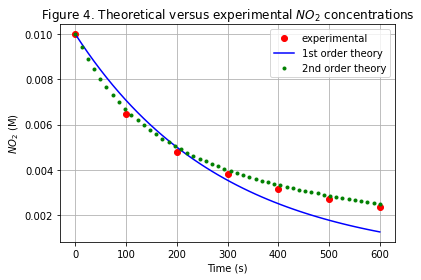

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# This code below generates 50 evenly-spaced points between 0 and 600 seconds
time_s_theor=np.linspace(0,600)

#recall that init_NO2_conc_M, k1 and k2 were previously defined in Part 3b so we do not need to re-define it (unless we want to change the value for half-life)
NO2_theor_1st_M= initial_NO2_conc_M*np.exp(-k1*time_s_theor)
NO2_theor_2nd_M=(((1/(initial_NO2_conc_M))+k2*time_s_theor))**(-1)

# This initializes the plot window
plt.figure()

# This plots NO2_conc_M_exp (independent variable) as a function of time_s_exp (dependent variable)
plt.title('Figure 4. Theoretical versus experimental $NO_2$ concentrations')
plt.xlabel('Time (s)')
plt.ylabel('$NO_2$ (M)')
plt.grid(True)

# These commands plot experimental data on the same graph as theoretical values for a 1st order decay and 2nd order decay.
# 'ro' means red circles, 'b-' means blue line and 'g.' means green dots (If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing)
plt.plot(time_s_exp,NO2_conc_M_exp,'ro',label='experimental')
plt.plot(time_s_theor,NO2_theor_1st_M,'b-',label='1st order theory')
plt.plot(time_s_theor,NO2_theor_2nd_M,'g.', label='2nd order theory')

#This command generates a legend.
plt.legend()

## In Your Notebook:
Take a screenshot of Figure 4 and paste it in the Results section of your lab notebook. In the Observations section, record the following: 
* The values of the 1st-order and 2nd-order rate constants. 
* Based on the figure above entitled "Theoretical versus experimental $NO_2$," which theoretical reaction mechanism (1st order rate law or 2nd order rate law) is closer to the experimentally-determined values for $NO_2$ decay?
* Compare the 1st and 2nd order decay curves shown in Figure 2 (ozone) and Figure 4 ($NO_2$). What do you notice is similar and what is different?

### Why can't we do this with EXCEL?

Python can be used to solve more sophisticated (and realistic) kinetics problems. Even though the calculations we showed above can be done with EXCEL because we can solve the differential equations numerically, there are some rate laws where an analytical integrated rate law is NOT possible. For those cases, you will need to use computational methods (like Python) to solve differential equations and predict the concentrations of products at later times. 

In an upper-division course taught in our department (Chem 150: Biophysical Chemistry), you will learn about reactions of the type 
<p style='text-align: right;'>
$A \longrightarrow  B  \longrightarrow  C $
</p>
<p>This leads to a build-up and then depletion of B. You will see that with pencil/paper or even EXCEL, you quickly get to mathematical equations that aren't easily solved by hand, hence the need for computer simulations! </p>

### Final Notes about Grading: 
In addition to answering the "In Your Notebook" questions in your Google doc notebook, your lab instructor will be looking for evidence of your careful reading and following of instructions embedded in the exercise. You will submit a link to this exercise as part of your postlab report on CAMINO.</p>